## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\gg\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.75,0.55,0.35,0.15]

In [20]:
results = {}
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.3f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.950
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 360us/step - loss: 2.1042 - acc: 0.2277 - val_loss: 2.2649 - val_acc: 0.1921
Epoch 2/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.8796 - acc: 0.3201 - val_loss: 1.9886 - val_acc: 0.2848
Epoch 3/50
50000/50000 [==============================] - 18s 350us/step - loss: 1.7966 - acc: 0.3540 - val_loss: 1.8793 - val_acc: 0.3327
Epoch 4/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.7187 - acc: 0.3810 - val_loss: 1.7142 - val_acc: 0.3902
Epoch 5/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.6518 - acc: 0.4066 - val_loss: 1.6424 - val_acc: 0.4051 loss: 1.6564 - a - ETA: 1s - loss: 1.6542 - acc: 0.4 - ETA: 0s - loss: 1.6526
Epoch 6/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.6094 - acc: 0.4241 - val_loss: 1.6828 - val_acc: 0.4068
Epoch 7/50
50000/50000 [==============

50000/50000 [==============================] - 12s 233us/step - loss: 2.0997 - acc: 0.2259 - val_loss: 1.8854 - val_acc: 0.3138
Epoch 2/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.8570 - acc: 0.3287 - val_loss: 1.8307 - val_acc: 0.3489
Epoch 3/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7442 - acc: 0.3728 - val_loss: 2.2276 - val_acc: 0.2377
Epoch 4/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.7001 - acc: 0.3878 - val_loss: 1.8083 - val_acc: 0.3639
Epoch 5/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.6351 - acc: 0.4150 - val_loss: 1.7080 - val_acc: 0.3821
Epoch 6/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.5903 - acc: 0.4342 - val_loss: 1.6276 - val_acc: 0.4183
Epoch 7/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5531 - acc: 0.4462 - val_loss: 1.7832 - val_acc: 0.3835
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.8416 - acc: 0.3359 - val_loss: 1.8014 - val_acc: 0.3496
Epoch 3/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7391 - acc: 0.3762 - val_loss: 1.6506 - val_acc: 0.4112
Epoch 4/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.6748 - acc: 0.4017 - val_loss: 1.6495 - val_acc: 0.4005
Epoch 5/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.6198 - acc: 0.4224 - val_loss: 1.6207 - val_acc: 0.4255
Epoch 6/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5926 - acc: 0.4320 - val_loss: 1.6460 - val_acc: 0.4092
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.5560 - acc: 0.4436 - val_loss: 1.5739 - val_acc: 0.4384
Epoch 8/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.5050 - acc: 0.4640 - val_loss: 1.8794 - val_acc: 0.3467
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 10s 193us/step - loss: 1.8370 - acc: 0.3397 - val_loss: 1.9183 - val_acc: 0.3044
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.7390 - acc: 0.3773 - val_loss: 1.8715 - val_acc: 0.3297
Epoch 4/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6723 - acc: 0.4054 - val_loss: 1.6667 - val_acc: 0.4080
Epoch 5/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.6266 - acc: 0.4195 - val_loss: 1.6357 - val_acc: 0.4098
Epoch 6/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5764 - acc: 0.4364 - val_loss: 1.6481 - val_acc: 0.4106
Epoch 7/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5418 - acc: 0.4499 - val_loss: 1.8095 - val_acc: 0.3403
Epoch 8/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.5097 - acc: 0.4606 - val_loss: 1.5846 - val_acc: 0.4385
Epoch 9/50
50000/50000 [==============

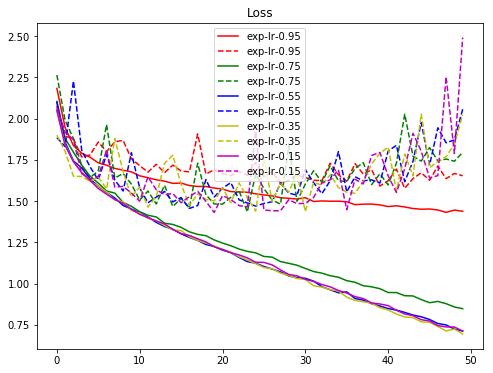

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()



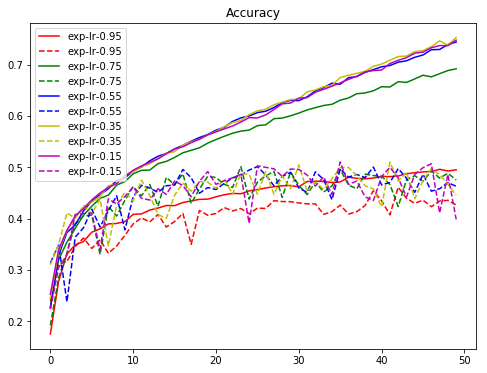

In [27]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [25]:
for i, cond in enumerate(results.keys()):
    print(i,cond)

0 exp-lr-0.95
1 exp-lr-0.75
2 exp-lr-0.55
3 exp-lr-0.35
4 exp-lr-0.15
